In [37]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots

import plotly.express as px
import plotly.graph_objs as go
from IPython.display import Image
import plotly.io as pio
pio.kaleido.scope.mathjax = None


import warnings
warnings.filterwarnings('ignore')

## Task1 : Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 new cases.

#### For this task, I used the data generated from stage 1 and normalized the cases and deaths column for Alabama state. Later I compare moments of distribution with the other states.

In [4]:
#Read the merged file from the Stage 1 ,  this file has confirmed_cases , confirmed_deaths and population dataset. 
covid_supermerged_data = pd.read_csv('../../../../data/superdataset.csv')

In [5]:
covid_supermerged_data.tail()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
2346471,56045,weston county,WY,2022-02-03,1491,17,6927
2346472,56045,weston county,WY,2022-02-04,1496,17,6927
2346473,56045,weston county,WY,2022-02-05,1496,17,6927
2346474,56045,weston county,WY,2022-02-06,1496,17,6927
2346475,56045,weston county,WY,2022-02-07,1508,17,6927


In [6]:
#Retrieving the data with State = 'AL'
AL_data= covid_supermerged_data[covid_supermerged_data['State']=="AL"]
AL_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629
50860,1133,winston county,AL,2022-02-04,7183,115,23629
50861,1133,winston county,AL,2022-02-05,7183,115,23629
50862,1133,winston county,AL,2022-02-06,7183,115,23629


In [7]:
#Find the difference of the two columns Confirmed and Deaths
AL_data['Num of Cases per day'] = AL_data['Confirmed'].diff()
AL_data['Num of Deaths per day'] = AL_data['Deaths'].diff()
AL_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,0,statewide unallocated,AL,2020-01-22,0,0,0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0


In [8]:
# removing the row that contains NAN 
AL_data= AL_data[AL_data['Date'] != '2020-01-22']
AL_data['Date'] = AL_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [9]:
AL_data_groupedBydate = AL_data.groupby("Date").sum().reset_index()
AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,2020-01-23,71489,0,0,4903185,0.0,0.0
1,2020-01-24,71489,0,0,4903185,0.0,0.0
2,2020-01-25,71489,0,0,4903185,0.0,0.0
3,2020-01-26,71489,0,0,4903185,0.0,0.0
4,2020-01-27,71489,0,0,4903185,0.0,0.0
...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0


In [10]:
AL_data_groupedBydate['Cases per day normalized'] = (AL_data_groupedBydate['Num of Cases per day']/AL_data_groupedBydate['population'])*1000000
AL_data_groupedBydate['Deaths per day normalized'] = (AL_data_groupedBydate['Num of Deaths per day']/AL_data_groupedBydate['population'])*1000000
AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized
0,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
1,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
2,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
3,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
4,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0,0.000000,0.000000
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0,2283.413740,31.816054
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000


In [11]:
AL_mean = AL_data_groupedBydate['Cases per day normalized'].mean()
AL_mean

340.1542787860785

In [12]:
AL_data_groupedBydate['PMF_AL'] = stats.poisson.pmf(k=AL_data_groupedBydate['Cases per day normalized'].round(decimals=0), mu=AL_mean)
AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized,PMF_AL
0,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
1,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
2,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
3,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
4,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
...,...,...,...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0,2283.413740,31.816054,0.000000e+00
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000,1.874449e-148


In [13]:
AL_data_groupedBydate.describe()

,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized,PMF_AL
count,747.0,7.470000e+02,747.000000,747.0,747.000000,747.000000,747.000000,747.000000,7.470000e+02
mean,71489.0,4.026981e+05,7352.366801,4903185.0,1667.839357,23.275770,340.154279,4.747071,8.256821e-04
std,0.0,3.272676e+05,5916.078518,0.0,4425.407707,41.954258,902.557767,8.556532,3.543468e-03
min,71489.0,0.000000e+00,0.000000,4903185.0,0.000000,-5.000000,0.000000,-1.019745,0.000000e+00
25%,71489.0,8.170350e+04,1491.000000,4903185.0,172.000000,0.000000,35.079239,0.000000,1.874449e-148
50%,71489.0,4.555820e+05,7566.000000,4903185.0,675.000000,9.000000,137.665619,1.835542,1.560537e-63
75%,71489.0,5.977245e+05,11567.500000,4903185.0,1690.000000,26.500000,344.673921,5.404650,4.699670e-18
max,71489.0,1.245876e+06,17387.000000,4903185.0,76151.000000,389.000000,15530.925307,79.336187,2.162962e-02


### Histogram of Normalized cases

<AxesSubplot:>

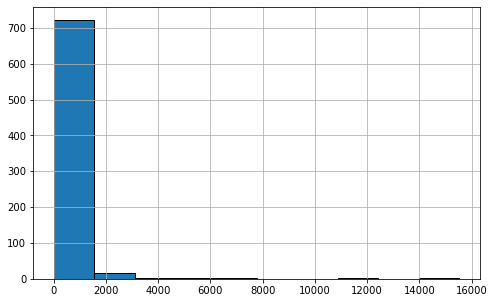

In [82]:
AL_data_groupedBydate["Cases per day normalized"].hist(bins=10, ec='black', figsize=(8,5))

From the plot graph we observe: 
1. The graphs shows the count of cases per day.
2. The data is skewed at the right which means its a positive skew. 
3. The data has a peak initially and then falls. 
4. Thus the data is discrete

Since the data is discrete, poison distribution is the best fit for this data. 

### Plot the Poisson Distribution for the Alabama State as the data is discrete. 

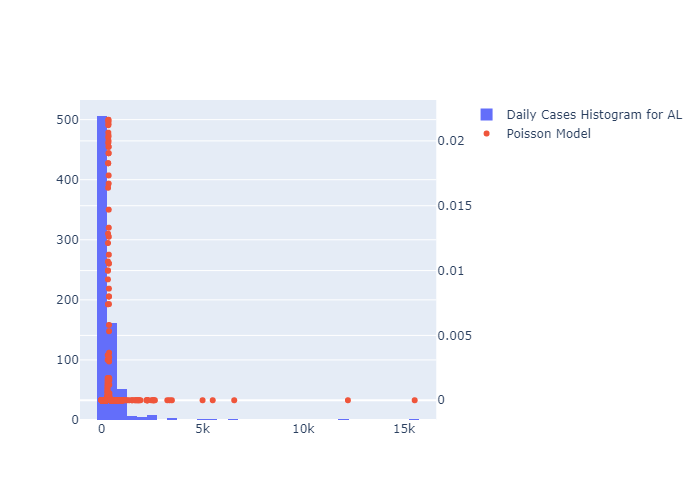

In [83]:
fig = go.Figure()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=AL_data_groupedBydate["Cases per day normalized"],nbinsx=40,name="Daily Cases Histogram for AL"))
fig.add_trace(go.Scatter(x=AL_data_groupedBydate["Cases per day normalized"], y= AL_data_groupedBydate["PMF_AL"],mode='markers', name="Poisson Model"), secondary_y=True)
fig.write_image("al_histDist.png")
Image(filename="al_histDist.png")

#fig.show()

### Calculated the mean of the above dataset from the describe method and used that mean to plot the poison distribution

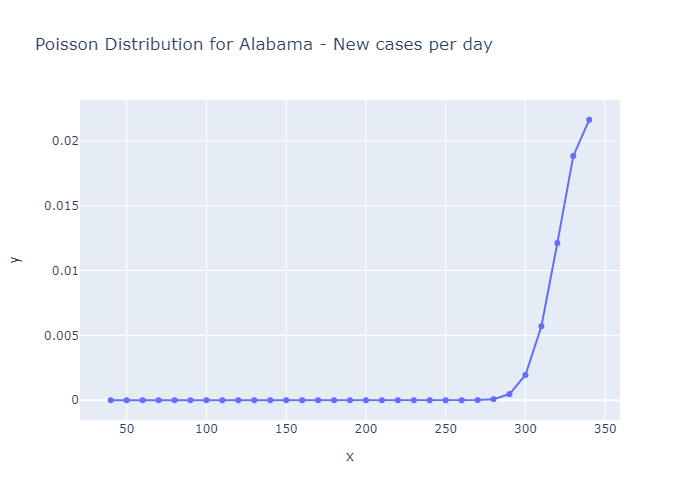

In [84]:
fig = px.scatter(AL_data_groupedBydate, x=range(40,350,10), y=stats.poisson.pmf(k=range(40,350,10),mu= 340.154279),title='Poisson Distribution for Alabama - New cases per day ')
fig.update_traces(mode='lines+markers')
fig.write_image("al_Distribution.png")
Image(filename="al_Distribution.png")
#fig.show()

## Inference

* I set the range from 40 to 350 and these are my interval where am calculating the probability mass distribution. 
* Using the mean obtained from the above dataset I found the mean and plotted a graph with x axis being my interval and y axis     being probability.
* From the graph we observe that initially the cases were low hence the probability in that Alabama state is zero but after few   intervals the cases rise and hence the probability of a person contracting covid is high. 

#### Moments of a distribution - center, variance, skewness, kurtosis

#### Calculating the moments of distribution to see how the data is spread , the peak values and also check the mean of the data

In [14]:
#mean
AL_data_groupedBydate['Cases per day normalized'].mean()

340.1542787860785

In [15]:
#variance
AL_data_groupedBydate['Cases per day normalized'].var()

814610.5234935433

In [16]:
#skewness
AL_data_groupedBydate['Cases per day normalized'].skew()

10.725900604575097

In [17]:
#kurtosis
AL_data_groupedBydate['Cases per day normalized'].kurt()

152.4980006931335

### Inference: 

* The mean of the Alabama state for new cases per day is 340.1542787860785
* The skewness is positive hence the tail of the distribution is longer towards the right hand side of the curve.
* The kurtosis is positive and tells distribution is peaked and possesses thick tails.
    

#### Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

#### For this task, I filtered the states that I am interested in and calculated the moments of distribution in those states. Before that, I normalized the cases and deaths column for the dataset

In [18]:
#Filter the states
compareother_states= covid_supermerged_data[covid_supermerged_data["State"].isin(["AZ","MN","NC","AR","CA","AL"])]
compareother_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
1501231,37199,yancey county,NC,2022-02-03,4425,46,18069
1501232,37199,yancey county,NC,2022-02-04,4439,48,18069
1501233,37199,yancey county,NC,2022-02-05,4439,48,18069
1501234,37199,yancey county,NC,2022-02-06,4439,48,18069


In [19]:
#Calculate new cases and deaths using the diff()
compareother_states['Cases per day'] = compareother_states['Confirmed'].diff()
compareother_states['Deaths per day'] = compareother_states['Deaths'].diff()
compareother_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Cases per day,Deaths per day
0,0,statewide unallocated,AL,2020-01-22,0,0,0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1501231,37199,yancey county,NC,2022-02-03,4425,46,18069,18.0,1.0
1501232,37199,yancey county,NC,2022-02-04,4439,48,18069,14.0,2.0
1501233,37199,yancey county,NC,2022-02-05,4439,48,18069,0.0,0.0
1501234,37199,yancey county,NC,2022-02-06,4439,48,18069,0.0,0.0


In [20]:
#remove the row with NAN
compareother_states= compareother_states[compareother_states['Date'] != '2020-01-22']
compareother_states['Date'] = compareother_states.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
compareother_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Cases per day,Deaths per day
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1501231,37199,yancey county,NC,2022-02-03,4425,46,18069,18.0,1.0
1501232,37199,yancey county,NC,2022-02-04,4439,48,18069,14.0,2.0
1501233,37199,yancey county,NC,2022-02-05,4439,48,18069,0.0,0.0
1501234,37199,yancey county,NC,2022-02-06,4439,48,18069,0.0,0.0


In [21]:
other_states_groupedByDate = compareother_states.groupby(["State","Date"]).sum().reset_index()
other_states_groupedByDate

,State,Date,countyFIPS,Confirmed,Deaths,population,Cases per day,Deaths per day
0,AL,2020-01-23,71489,0,0,4903185,0.0,0.0
1,AL,2020-01-24,71489,0,0,4903185,0.0,0.0
2,AL,2020-01-25,71489,0,0,4903185,0.0,0.0
3,AL,2020-01-26,71489,0,0,4903185,0.0,0.0
4,AL,2020-01-27,71489,0,0,4903185,0.0,0.0
...,...,...,...,...,...,...,...,...
4477,NC,2022-02-03,3710000,2457857,21027,10488084,14966.0,123.0
4478,NC,2022-02-04,3710000,2470242,21097,10488084,12385.0,70.0
4479,NC,2022-02-05,3710000,2470242,21097,10488084,0.0,0.0
4480,NC,2022-02-06,3710000,2470242,21097,10488084,0.0,0.0


In [22]:
other_states_groupedByDate['Num of Cases per day normalized'] = (other_states_groupedByDate['Cases per day']/other_states_groupedByDate['population'])*1000000
other_states_groupedByDate['Num of Deaths per day normalized'] = (other_states_groupedByDate['Deaths per day']/other_states_groupedByDate['population'])*1000000
other_states_groupedByDate

,State,Date,countyFIPS,Confirmed,Deaths,population,Cases per day,Deaths per day,Num of Cases per day normalized,Num of Deaths per day normalized
0,AL,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
1,AL,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
2,AL,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
3,AL,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
4,AL,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4477,NC,2022-02-03,3710000,2457857,21027,10488084,14966.0,123.0,1426.952721,11.727595
4478,NC,2022-02-04,3710000,2470242,21097,10488084,12385.0,70.0,1180.863921,6.674241
4479,NC,2022-02-05,3710000,2470242,21097,10488084,0.0,0.0,0.000000,0.000000
4480,NC,2022-02-06,3710000,2470242,21097,10488084,0.0,0.0,0.000000,0.000000


In [23]:
other_states_weekly = other_states_groupedByDate.groupby(["State", pd.Grouper(key='Date', freq='w')])['Num of Cases per day normalized','Num of Deaths per day normalized'].agg({'Num of Cases per day normalized':'mean',
                                                                                                'Num of Deaths per day normalized' :'mean'}).reset_index()
other_states_weekly

,State,Date,Num of Cases per day normalized,Num of Deaths per day normalized
0,AL,2020-01-26,0.000000,0.000000
1,AL,2020-02-02,0.000000,0.000000
2,AL,2020-02-09,0.000000,0.000000
3,AL,2020-02-16,0.000000,0.000000
4,AL,2020-02-23,0.000000,0.000000
...,...,...,...,...
643,NC,2022-01-16,2655.013061,3.868336
644,NC,2022-01-23,2261.818542,2.792284
645,NC,2022-01-30,2690.250329,6.633378
646,NC,2022-02-06,1299.106954,6.837692


#### calculate the mean of all the states with the normalized cases data

In [24]:
#Mean of the Num of Cases normalized
stats_other_states_data=other_states_weekly.groupby('State')['Num of Cases per day normalized'].agg('mean').reset_index().round(decimals=0)
stats_other_states_data

,State,Num of Cases per day normalized
0,AL,345.0
1,AR,346.0
2,AZ,370.0
3,CA,273.0
4,MN,328.0
5,NC,333.0


#### Kurtosis :

In [25]:
kurt_otherstates = other_states_weekly.groupby('State')["Num of Cases per day normalized"].apply(pd.DataFrame.kurt)
kurt_otherstates

State
AL    17.547229
AR    11.767442
AZ     8.599633
CA    13.972892
MN     7.563304
NC    11.023188
Name: Num of Cases per day normalized, dtype: float64

#### Variance : 

In [26]:
#Variance
variance_otherstates = other_states_weekly.groupby('State')['Num of Cases per day normalized'].var()
variance_otherstates

State
AL    235703.106841
AR    207326.902731
AZ    293783.561173
CA    228390.973538
MN    176200.467906
NC    262643.127881
Name: Num of Cases per day normalized, dtype: float64

#### Skewness :

In [27]:
#Skewness
skew_otherstates = other_states_weekly.groupby('State')['Num of Cases per day normalized'].skew()
skew_otherstates

State
AL    3.634285
AR    3.061004
AZ    2.855480
CA    3.532426
MN    2.504201
NC    3.245990
Name: Num of Cases per day normalized, dtype: float64

#### Median: 

In [28]:
median_otherstates = other_states_weekly.groupby('State')['Num of Cases per day normalized'].median()
median_otherstates

State
AL    190.328182
AR    214.986034
AZ    177.788397
CA    113.277858
MN    171.427092
NC    173.891219
Name: Num of Cases per day normalized, dtype: float64

### Inference 

* The above table shows the statistics of the distribution of the data of all the states. 
* In kurtosis, Alabama is highly peaked and Minnesota is low.
* The data is positively skewed for all the states and the skewness is observed towards right which is same for all states. 


### Task 2 : Model Distribution for new cases and deaths

#### In this task I  used the normalized cases and deaths to plot the distribution with x axis being the random interval against the probability. I used a combined dataset to show the cases and deaths distribution for all the states in a single graph. 

#### Calculate the Probability for the cases and deaths columns and plot the poisson distribution of all the states

In [29]:
other_states_weekly.describe()

,Num of Cases per day normalized,Num of Deaths per day normalized
count,648.000000,648.000000
mean,332.508518,3.762157
std,482.795856,4.337668
min,-2.658879,-0.142014
25%,65.953475,1.139506
50%,171.177500,2.260281
75%,387.292355,4.941131
max,3387.273491,34.793512


In [100]:
k_values = range(40,170,10)
states = stats_other_states_data['State']
means = stats_other_states_data['Num of Cases per day normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_distribution_cases_otherstates =pd.DataFrame.from_dict(data_dict)
poisson_distribution_cases_otherstates

,state,mean,k_value,probability
0,AL,345.0,40,5.881966e-97
1,AL,345.0,50,3.769499e-88
2,AL,345.0,60,3.291354e-80
3,AL,345.0,70,5.461795e-73
4,AL,345.0,80,2.183754e-66
...,...,...,...,...
73,NC,333.0,120,1.769505e-41
74,NC,333.0,130,3.068985e-37
75,NC,333.0,140,2.471839e-33
76,NC,333.0,150,9.765155e-30


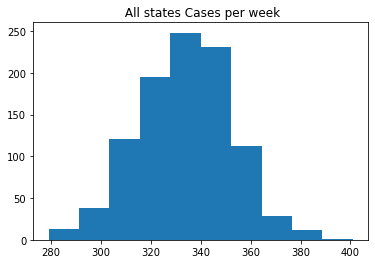

In [101]:
states = stats.poisson.rvs(size = 1000, mu = 332.508518)
plt.hist(states)
plt.title(" All states Cases per week") 
plt.show()

1. I calculated the mean of all cases for the entire dataset and plotted the poison distribution for the 6 states dataset.
2. From the graph we observe that the range from 320 - 340 it is the average cases in all the states. So weekly there were 200 cases in every state. So we can predict that the every week we can expect atleast around 250 cases in all states. That is 250 people contracted with covid every week in most states. This number can be less in other states but minimum is 250.


### Model Distribution for New Deaths 

In [30]:
other_states_weekly_data_deaths_stats=other_states_weekly.groupby('State')['Num of Deaths per day normalized'].agg('mean').reset_index()
other_states_weekly_data_deaths_stats

,State,Num of Deaths per day normalized
0,AL,4.716457
1,AR,4.601001
2,AZ,4.959920
3,CA,2.722670
4,MN,2.777959
5,NC,2.794933


In [31]:
#Variance
variance_otherstates = other_states_weekly.groupby('State')['Num of Deaths per day normalized'].var()
variance_otherstates

State
AL    31.660695
AR    24.744672
AZ    25.693557
CA    12.580006
MN     6.470473
NC     6.531909
Name: Num of Deaths per day normalized, dtype: float64

In [32]:
#Skewness
skew_otherstates = other_states_weekly.groupby('State')['Num of Deaths per day normalized'].skew()
skew_otherstates

State
AL    2.470528
AR    2.589078
AZ    1.693840
CA    2.749635
MN    1.251768
NC    1.698739
Name: Num of Deaths per day normalized, dtype: float64

In [33]:
mean_otherstates = other_states_weekly.groupby('State')['Num of Deaths per day normalized'].mean()
mean_otherstates

State
AL    4.716457
AR    4.601001
AZ    4.959920
CA    2.722670
MN    2.777959
NC    2.794933
Name: Num of Deaths per day normalized, dtype: float64

In [34]:
median_otherstates = other_states_weekly.groupby('State')['Num of Deaths per day normalized'].median()
median_otherstates

State
AL    2.942694
AR    3.384675
AZ    3.356164
CA    1.849012
MN    1.785831
NC    2.002272
Name: Num of Deaths per day normalized, dtype: float64

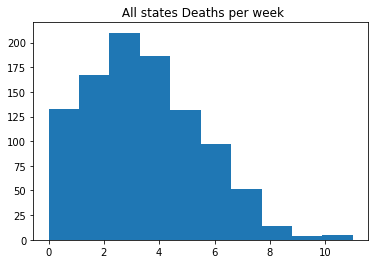

In [36]:
states = stats.poisson.rvs(size = 1000, mu = 3.762157)
plt.hist(states)
plt.title(" All states Deaths per week") 
plt.show()

* I calculated the mean of all deaths for the entire dataset and plotted the poison distribution for the 6 states dataset.

In [107]:
k_values = range(12)
states = other_states_weekly_data_deaths_stats['State']
means = other_states_weekly_data_deaths_stats['Num of Deaths per day normalized']
columns = ['state','mean','k_value','probability']

data_dict={}
for column in columns:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_deaths=pd.DataFrame.from_dict(data_dict)
poisson_data_deaths

,state,mean,k_value,probability
0,AL,4.716457,0,0.008947
1,AL,4.716457,1,0.042197
2,AL,4.716457,2,0.099511
3,AL,4.716457,3,0.156446
4,AL,4.716457,4,0.184468
...,...,...,...,...
67,NC,2.794933,7,0.016156
68,NC,2.794933,8,0.005645
69,NC,2.794933,9,0.001753
70,NC,2.794933,10,0.000490


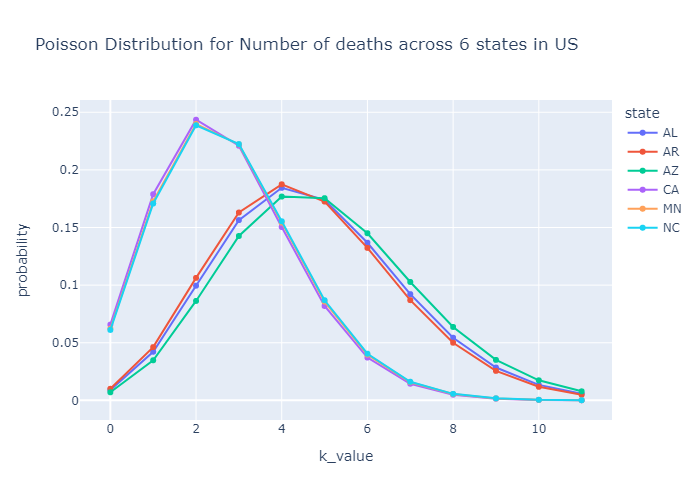

In [108]:
#Poisson distribution for deaths
fig = px.scatter(poisson_data_deaths, x="k_value", y="probability", color='state',title='Poisson Distribution for Number of deaths across 6 states in US')
fig.update_traces(mode='lines+markers')
fig.write_image("death_StatePoissonDistribution.png")
Image(filename="death_StatePoissonDistribution.png")
#fig.show()

### Inference : 

* We observe that all the states were having same deaths rates during a given interval
* The whole dataset we observe the probability of death rate in all states is in the range 0.20 - 0.25. This is a weekly dataset 
  and hence the death rates seem to decrease at the start and end of a particular interval. 
* The reason for the decrease could be reduced number of cases. Thus we compare that as the number of cases rose, 
  the death rates also increased and vice versa.

### Task 3: Perform correlation between Enrichment data variables and COVID-19 cases to observe any patterns.

## Using the merged enrichment data and the covid data from previous stage to  correlate the chosen variables

In [38]:
#read the CSV file
hospital_dataset = pd.read_csv("../../../../data/covid_hospitalbed_merge.csv")
hospital_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
0,0,statewide unallocated,AL,2020-01-22,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0


In [39]:
#Filtering 6 states to correlate the variables 
hospital_dataset = hospital_dataset[hospital_dataset["State"].isin(["AZ","MN","NC","AR","CA","AL"])]
hospital_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
0,0,statewide unallocated,AL,2020-01-22,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0


In [40]:
#Calculate the diff() of the columns 
hospital_dataset['Confirmed'] = hospital_dataset['Confirmed'].diff()
hospital_dataset['Deaths'] = hospital_dataset['Deaths'].diff()

In [41]:
#normalize the data by 100000
hospital_dataset['normalized cases']= (hospital_dataset['Confirmed']/hospital_dataset['population'])*100000
hospital_dataset['normalized deaths']= (hospital_dataset['Deaths']/hospital_dataset['population'])*100000

In [42]:
hospital_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid,normalized cases,normalized deaths
0,0,statewide unallocated,AL,2020-01-22,NaN,NaN,0,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0.0,0.0,0,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,NaN,NaN
2,0,statewide unallocated,AL,2020-01-24,0.0,0.0,0,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,NaN,NaN
3,0,statewide unallocated,AL,2020-01-25,0.0,0.0,0,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,NaN,NaN
4,0,statewide unallocated,AL,2020-01-26,0.0,0.0,0,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,NaN,NaN


In [43]:
#remove the County_Name = statewide unallocated
hospital_dataset= hospital_dataset[hospital_dataset['County_Name'] != 'statewide unallocated']
hospital_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid,normalized cases,normalized deaths
748,1001,autauga county,AL,2020-01-22,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
749,1001,autauga county,AL,2020-01-23,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
750,1001,autauga county,AL,2020-01-24,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
751,1001,autauga county,AL,2020-01-25,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
752,1001,autauga county,AL,2020-01-26,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0


In [44]:
# removing the row that contains NAN 
hospital_dataset= hospital_dataset[hospital_dataset['Date'] != '2020-01-22']
hospital_dataset['Date'] = hospital_dataset.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
hospital_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid,normalized cases,normalized deaths
749,1001,autauga county,AL,2020-01-23,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
750,1001,autauga county,AL,2020-01-24,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
751,1001,autauga county,AL,2020-01-25,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
752,1001,autauga county,AL,2020-01-26,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0
753,1001,autauga county,AL,2020-01-27,0.0,0.0,55869,0,8,15066,...,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28.0,0.0,0.0


### Calculating the statistics of the dataset to know the mean

In [45]:
hospital_dataset.describe()

,countyFIPS,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,...,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,deaths_covid,normalized cases,normalized deaths
count,299547.000000,299547.000000,299547.000000,2.995470e+05,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,...,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000,299547.000000
mean,17267.281796,52.537298,0.555132,1.744591e+05,6.286783,64.496259,21998.892768,17375.441397,3092.678304,577.793017,...,2800.256858,2269.962594,0.785216,0.179483,0.140516,0.270929,0.821884,23.029925,31.452104,0.399098
std,14666.197733,677.869630,4.473975,6.441627e+05,4.114945,48.787069,18399.263023,14634.115562,2503.789141,457.633635,...,2349.124367,2029.808906,0.050947,0.026999,0.019658,0.054316,0.045387,18.605506,78.430205,1.937154
min,1001.000000,-42405.000000,-156.000000,1.129000e+03,0.000000,1.000000,9057.000000,6367.000000,1129.000000,160.000000,...,975.000000,872.000000,0.702992,0.139953,0.119307,0.190931,0.738136,3.000000,-4138.546489,-64.141893
25%,5037.000000,0.000000,0.000000,1.657600e+04,4.000000,8.000000,9639.000000,8200.000000,1241.000000,312.000000,...,1145.000000,926.000000,0.748507,0.167025,0.129121,0.232720,0.787844,3.000000,0.000000,0.000000
50%,6089.000000,3.000000,0.000000,3.743200e+04,7.000000,89.000000,15066.000000,11277.000000,1880.000000,424.000000,...,1662.000000,1574.000000,0.803845,0.171831,0.133786,0.282855,0.796716,28.000000,8.847992,0.000000
75%,27173.000000,19.000000,0.000000,1.008800e+05,7.000000,109.000000,23252.000000,18691.000000,3970.000000,685.000000,...,3510.000000,2306.000000,0.832344,0.195556,0.139389,0.305667,0.856895,34.000000,33.078092,0.000000
max,37199.000000,186408.000000,305.000000,1.003911e+07,14.000000,115.000000,65153.000000,51569.000000,8613.000000,1606.000000,...,8052.000000,7064.000000,0.850711,0.214769,0.172751,0.343234,0.895172,48.000000,4871.995092,181.159420


### Plot the poisson distribution on new cases and deaths

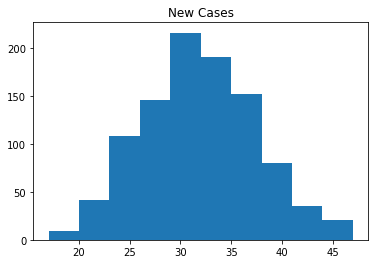

In [46]:
nc = stats.poisson.rvs(size = 1000, mu = 31.452104)
plt.hist(nc)
plt.title("New Cases") 
plt.show()

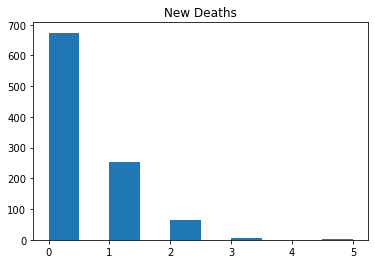

In [47]:
import matplotlib.pyplot as plt
hd = stats.poisson.rvs(size = 1000, mu = 0.399098)
plt.hist(hd)
plt.title("New Deaths") 
plt.show()

#### Correlation on the entire columns of the merged covid and hospital dataset. 

In [48]:
hospital_dataset.corr()

,countyFIPS,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,...,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,deaths_covid,normalized cases,normalized deaths
countyFIPS,1.000000,-0.027332,-0.056518,-0.100925,-0.001407,0.135137,-0.141380,-0.113336,-0.020640,-0.131886,...,-0.044216,-0.175751,0.649294,0.245431,0.564973,-0.146198,0.101814,0.375719,0.001708,-0.035333
Confirmed,-0.027332,1.000000,0.438004,0.308859,0.071617,0.039671,0.080617,0.080892,0.076709,0.076678,...,0.077396,0.081022,0.016122,-0.012732,-0.005130,-0.029609,-0.027887,0.022778,0.210305,0.018998
Deaths,-0.056518,0.438004,1.000000,0.507920,0.108526,0.057129,0.118960,0.119311,0.111782,0.112516,...,0.112938,0.120005,0.021439,-0.023412,-0.013410,-0.045346,-0.048876,0.027466,0.081090,0.154194
population,-0.100925,0.308859,0.507920,1.000000,0.273683,0.152813,0.315873,0.316527,0.300430,0.301173,...,0.303324,0.317424,0.054912,-0.048198,-0.022496,-0.110971,-0.098799,0.090411,-0.004619,-0.011310
critical_staffing_shortage_today_yes,-0.001407,0.071617,0.108526,0.273683,1.000000,0.790629,0.773114,0.776637,0.786548,0.772314,...,0.792600,0.770491,0.056541,0.205983,0.251067,-0.018224,-0.524726,0.216365,-0.032154,-0.037246
critical_staffing_shortage_today_no,0.135137,0.039671,0.057129,0.152813,0.790629,1.000000,0.555159,0.549680,0.647618,0.649240,...,0.642355,0.548318,-0.267111,0.761189,0.725395,0.535432,-0.096351,0.537738,-0.019908,-0.019519
inpatient_beds,-0.141380,0.080617,0.118960,0.315873,0.773114,0.555159,1.000000,0.999312,0.986175,0.987701,...,0.990105,0.999374,0.108340,0.050760,0.127147,-0.191031,-0.038828,0.508708,-0.042223,-0.041600
inpatient_beds_used,-0.113336,0.080892,0.119311,0.316527,0.776637,0.549680,0.999312,1.000000,0.987088,0.984058,...,0.990448,0.997651,0.143988,0.039693,0.131094,-0.215919,-0.048132,0.511408,-0.042300,-0.042918
inpatient_beds_used_covid,-0.020640,0.076709,0.111782,0.300430,0.786548,0.647618,0.986175,0.987088,1.000000,0.992034,...,0.999520,0.981185,0.122921,0.187893,0.287239,-0.108073,0.023670,0.621115,-0.041145,-0.043009
staffed_icu_adult_patients_confirmed_and_suspected_covid,-0.131886,0.076678,0.112516,0.301173,0.772314,0.649240,0.987701,0.984058,0.992034,1.000000,...,0.994005,0.986757,0.008118,0.200900,0.249349,-0.042278,0.041465,0.593157,-0.040809,-0.038096


###  Inference : 


From the above table we get to see the county wise correlation. 

* Normalized cases and inpatient_beds_used_covid have a positive correlation wheich means when the cases increase the beds       accomadated by patients affected due to covid also increase.
* Normalized cases and critical_staffing_shortage_today_yes there is a positive correlation as the staff may be affected due to   covid which lead to the staff shortage. Hence these variables have a positive correlation.
* Also the adult_icu_bed_utilization variable also has a positive correlation. 

### Since am not interested in all the columns I will select  3 variables from the above table to correlate with the new cases. 

* normalized cases
* normalized deaths
* inpatient_beds_used_covid
* adult_icu_bed_covid_utilization
* critical_staffing_shortage_today_yes

### Creating new data set with the required columns

In [49]:
hospital_dataset_corr = hospital_dataset[['normalized cases' , 'normalized deaths' , 'adult_icu_bed_covid_utilization' , 'inpatient_beds_used_covid'  ,'critical_staffing_shortage_today_yes']]
hospital_dataset_corr

,normalized cases,normalized deaths,adult_icu_bed_covid_utilization,inpatient_beds_used_covid,critical_staffing_shortage_today_yes
749,0.000000,0.000000,0.282855,1880,0
750,0.000000,0.000000,0.282855,1880,0
751,0.000000,0.000000,0.282855,1880,0
752,0.000000,0.000000,0.282855,1880,0
753,0.000000,0.000000,0.282855,1880,0
...,...,...,...,...,...
1501231,99.618130,5.534341,0.305667,3970,7
1501232,77.480768,11.068681,0.305667,3970,7
1501233,0.000000,0.000000,0.305667,3970,7
1501234,0.000000,0.000000,0.305667,3970,7


In [50]:
hospital_dataset_corr.corr()

,normalized cases,normalized deaths,adult_icu_bed_covid_utilization,inpatient_beds_used_covid,critical_staffing_shortage_today_yes
normalized cases,1.000000,0.141627,0.013475,-0.041145,-0.032154
normalized deaths,0.141627,1.000000,0.032603,-0.043009,-0.037246
adult_icu_bed_covid_utilization,0.013475,0.032603,1.000000,-0.108073,-0.018224
inpatient_beds_used_covid,-0.041145,-0.043009,-0.108073,1.000000,0.786548
critical_staffing_shortage_today_yes,-0.032154,-0.037246,-0.018224,0.786548,1.000000


### Hypothesis between Enrichment data and number of cases to be compared against states.

•	We see that as the normalized cases increase, the death cases also increased. This is because the two variables have a positive correlation and thus if one variable increases the other increases as well.

•	With cases and adult_icu_bed_covid_utilization variables the correlation is positive so as the cases increased the beds used also increased


•	With cases and critical_staffing_shortage_today_yes, the relation is negative. This means that with increase in cases, there might be a possibility that the staff member are also affected in the hospital and hence there is shortage of staff.
And same goes with the Deaths. Thus, I conclude that we are trying to show how the variables are correlated with each    other and how its dependent or effects the other variable.
